# Me in numbers

In [1]:

from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

%matplotlib inline

In [2]:

data_path = Path().resolve().parent / 'data' / 'me_in_numbers'
weight_data_file = data_path / 'weight' / 'history.csv'
print(f'Path: {data_path} exists: {data_path.exists()}')


Path: /home/luiscberrocal/PycharmProjects/ml_hands_on/data/me_in_numbers exists: True


In [3]:
df = pd.read_csv(weight_data_file)
df.head()

,Weight (lb),Body Fat,Muscle Mass,Water,BMI,Date/Time
0,172.6,19.6%,36%,62.9%,24.1,Jan 10 2018 12:42:52 PM
1,172.8,19.7%,36%,62.8%,24.1,Jan 11 2018 07:13:30 AM
2,173.6,19.8%,35.9%,62.7%,24.2,Jan 12 2018 07:39:54 AM
3,172.2,19.5%,36%,62.9%,24.0,Jan 13 2018 08:02:41 AM
4,172.2,19.5%,36%,62.9%,24.0,Jan 13 2018 08:04:04 AM


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Weight (lb)  1270 non-null   float64
 1   Body Fat     1270 non-null   object 
 2   Muscle Mass  1270 non-null   object 
 3   Water        1270 non-null   object 
 4   BMI          1270 non-null   float64
 5   Date/Time    1270 non-null   object 
dtypes: float64(2), object(4)
memory usage: 59.7+ KB


In [6]:
start_date = df['Date/Time'].min()
end_date = df['Date/Time'].max()

print(f'Start: {start_date} End: {end_date}')

Start: Apr 01 2018 09:53:43 AM End: Sep 30 2021 06:30:50 AM


<AxesSubplot:>

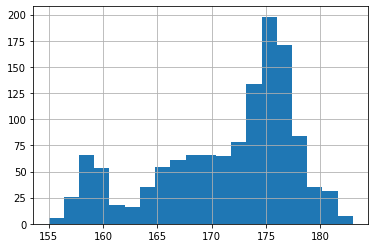

In [9]:
df['Weight (lb)'].hist(bins=20)